In [1]:
'''Asssignment 03'''
''' Name: Mayisha Farzana 
    ID: 160204028'''


' Name: Mayisha Farzana \n    ID: 160204028'

In [196]:
'''Problem 1 '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_dataset = np.loadtxt('test-Minimum-Error-Rate-Classifier.txt',delimiter=",",dtype='float64')
print(train_dataset)
length=len(train_dataset)
print(length)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]
6


In [197]:
import numpy as np

def normal_distribution(x, u, cov):  
    k = len(u)               # scalar dimension    
    uu = u.copy() #mu
    xx = x.copy() #x
    t1 = (2 * np.pi)**k          # scalar (2pie)^k
    t2 = np.linalg.det(cov)      # scalar   det(covariance)
   # print('t1*t2',t1,t2,t1*t2)
    #print('cov',cov)
    t3 = 1.0 / np.sqrt(t1 * t2)  # scalar 

    t4 = np.transpose(xx - uu)          # (x-mu)T
    t5 = np.linalg.inv(cov)   # inverse(covariance)
    t6 = (xx - uu)            # (x-mu)
    t7 = -0.5 * (np.dot(t4,t5).dot(t6))           
    #print('t3 and t7',t3,t7,np.exp(t7))
    result = t3 * np.exp(t7)  # 1x1
    #print('T3 ',t3)
   # print("hi", t3, t7, np.exp(t7), t3 * np.exp(t7))

    return result    


In [198]:
#Initialize
mu1=np.array([0,0]).reshape(2,)
mu2=np.array([2,2]).reshape(2,)
cov1=np.array([.25,.3,.3,1]).reshape(2,2)
cov2=np.array([.5,0,0,.5]).reshape(2,2)
p_w1=0.5
p_w2=0.5

In [199]:
x_class1=[]
y_class1=[]
x_class2=[]
y_class2=[]
for x in  train_dataset:     
    posterior1=p_w1*normal_distribution(np.array([x[0],x[1]]),mu1 , cov1) 
    posterior2=p_w2*normal_distribution(np.array([x[0],x[1]]),mu2 , cov2)
    print( posterior1, posterior2)
    if( posterior1> posterior2):
        print("class 1") 
        x_class1.append(x[0])
        y_class1.append(x[1])
    else:
        print("class 2")
        x_class2.append(x[0])
        y_class2.append(x[1])


0.026095731682525155 0.021539279301848634
class 1
0.0006137127856362326 7.225623237724323e-06
class 1
2.4419401818108763e-15 3.5974259813700723e-07
class 2
4.763869193476966e-13 1.394873426608797e-08
class 2
0.008740975213082243 0.0029150244650281935
class 1
8.523208716126741e-15 2.2103349154917858e-12
class 2


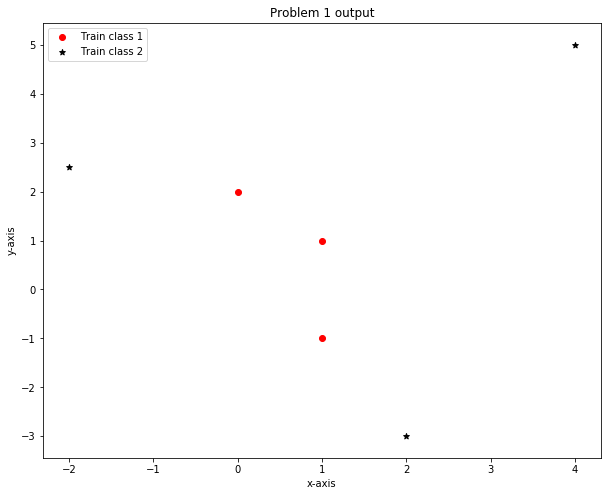

In [200]:
fig,ax=plt.subplots()#to show it in the same figure
plt.title("Problem 1 output")
plt.xlabel('x-axis', color='black')
plt.ylabel('y-axis', color='black')
ax.scatter(x_class1,y_class1,marker='o',color='r',label='Train class 1')
ax.scatter(x_class2,y_class2,marker='*',color='black',label='Train class 2')
fig.set_figheight(8)
fig.set_figwidth(10)
ax.legend()#show the output figure

(40, 40, 2)


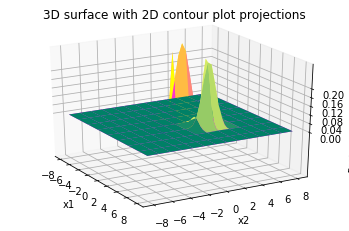

In [303]:
'''Contour Plotting'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-8, 8, N)#it divides the -8 to 8 range in to 40 piece
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)#Make N-D coordinate arrays for vectorized evaluations of N-D scalar
#print('X',X)
# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
cov1 = np.array([[ .25 , 0.3], [.3,  1.]])
mu2 = np.array([2.,2.])
cov2 = np.array([[ .5 , 0.], [0.,  .5]])
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))#taking X shape(40,40)and one additional dimension 2D points
print(pos.shape)
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, cov):
    """Return the multivariate Gaussian distribution on array pos."""
    dimen = mu.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    N = np.sqrt((2*np.pi)**dimen * cov_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    ans= np.einsum('...a,ab,...b->...', pos-mu, cov_inv, pos-mu)#EINSTEIN SUMMATION
    #result=einsum("□□,□□□,□□->□□",arg1,arg2,arg3)
    return np.exp(-ans / 2) / N
Z = multivariate_gaussian(pos, mu1, cov1)
Z1 = multivariate_gaussian(pos, mu2, cov2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
#db=Z-Z1#decision boundary
z=0
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability density')
ax.scatter(x_class1,y_class1, z,color='red')
ax.scatter(x_class2,y_class2, z,color='blue')
#print(len(pos),pos.shape)
ax.plot_surface(X, Y, Z, rstride=3, cstride=5, linewidth=2, antialiased=True,
                cmap=cm.spring)
ax.plot_surface(X, Y, Z1, rstride=3, cstride=5, linewidth=2, antialiased=True,
                cmap=cm.summer)
#ax.contourf(X, Y, db, zdir='z', offset=-0.22, cmap=cm.cool)
ax.set_title('3D surface with 2D contour plot projections')
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(0,0.2,6))
ax.view_init(25, -30)
plt.show()

(40, 40, 2)


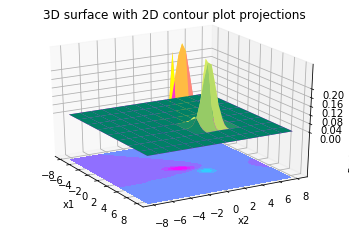

In [304]:
'''Drawing Decision Boundary'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-8, 8, N)#it divides the -8 to 8 range in to 40 piece
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)#Make N-D coordinate arrays for vectorized evaluations of N-D scalar
#print('X',X)
# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
cov1 = np.array([[ .25 , 0.3], [.3,  1.]])
mu2 = np.array([2.,2.])
cov2 = np.array([[ .5 , 0.], [0.,  .5]])
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))#taking X shape(40,40)and one additional dimension 2D points
print(pos.shape)
pos[:, :, 0] = X
pos[:, :, 1] = Y
def multivariate_gaussian(pos, mu, cov):
    """Return the multivariate Gaussian distribution on array pos."""
    dimen = mu.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    N = np.sqrt((2*np.pi)**dimen * cov_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    ans= np.einsum('...a,ab,...b->...', pos-mu, cov_inv, pos-mu)#EINSTEIN SUMMATION
    #result=einsum("□□,□□□,□□->□□",arg1,arg2,arg3)
    return np.exp(-ans / 2) / N
Z = multivariate_gaussian(pos, mu1, cov1)
Z1 = multivariate_gaussian(pos, mu2, cov2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
db=Z-Z1#decision boundary
z=0
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability density')
ax.scatter(x_class1,y_class1, z,color='red')
ax.scatter(x_class2,y_class2, z,color='blue')
#print(len(pos),pos.shape)
ax.plot_surface(X, Y, Z, rstride=3, cstride=5, linewidth=2, antialiased=True,
                cmap=cm.spring)
ax.plot_surface(X, Y, Z1, rstride=3, cstride=5, linewidth=2, antialiased=True,
                cmap=cm.summer)
ax.contourf(X, Y, db, zdir='z', offset=-0.22, cmap=cm.cool)
ax.set_title('3D surface with 2D contour plot projections')
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(0,0.2,6))
ax.view_init(25, -30)
plt.show()